In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
# from DYNASMART_Process import *
from Modules import DYNASMART_Process as dy
# import preprocessing_read_skim_file as rs
from Modules import AV_functions as av
from Modules import Solve_DARP as sod
from Modules import Postprocess_DARP as pod
from Modules import Preprocess_DARP as prd
from Modules import DARP_to_DYNA as dtd
from gurobipy import *
from Modules import *
import datetime
import requests
import math
import importlib

%load_ext autoreload
%autoreload 2

In [433]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
personData=pd.read_csv('input/personData_1.csv')
person_type_dic=dict(zip(personData.person_id,personData.type))
traveler_trips=pd.read_csv('input/traveler_trip_info_improved.csv',index_col=0)
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
superzone_filepath='Input/SuperZone.dat'
linktraveltime_filepath='Input/output_td_linktraveltime.dat'
superzone_map=dy.read_superzone_info(superzone_filepath)
origin_path='Input/origin.dat'
destination_path='Input/destination.dat'
origins,destinations,origin_links=dy.read_origin_destion(origin_path,destination_path)
origin_links['length']=origin_links.apply(lambda row: 
                                          link_detail[int(link_id[node_id[row.u_node],node_id[row.d_node]])][0,4],axis=1)
VPNRSkim_folder_filepath='Input/vehicularPNRSkim'
Vehicular_Skim,Vehicular_Skim_Dict=dy.read_vehicle_skim(VPNRSkim_folder_filepath)
transit_skim_folderpath='Input/'
TransitMazTazFlag,drivingweight,walkingweight,\
TransitSkimTimeIntervalLength,MaxNumTransitSkimTimeInterval,WalkSpeed,transit_zone_candidates,\
Transit_AB_Cost_Skim,Transit_AB_Time_Skim,three_link_walk=dy.read_transitskim(transit_skim_folderpath)
Transit_AB_Cost_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Cost_Skim,TransitSkimTimeIntervalLength)
Transit_AB_Time_Skim_Dict=dy.convert_skim_dataframe_to_dict(Transit_AB_Time_Skim,TransitSkimTimeIntervalLength)
transit_zone_dict={}
for link_zone in three_link_walk.three_link_zone.unique():
    transit_zone_dict[link_zone]=list(three_link_walk[three_link_walk.three_link_zone==link_zone]['transit_zone'].astype(int))
intrasuperzone_vehicle_filepath='Input/intrasuperzone_vehicle.dat'
intrasuperzone_path_filepath='Input/intrasuperzone_path.dat'
intrasuperzone_info,intrasuperzone_path_dic=dtd.read_intrasuperzone_files(intrasuperzone_vehicle_filepath,intrasuperzone_path_filepath)

56 57 72


In [438]:
run_name='allhhcartrip1/'
output_filepath='Output/'+run_name
route_info_allcar=pd.read_csv(output_filepath+'route_info.csv')
darp_solution=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
dtd.write_darp_solution_to_file(run_name,route_info_allcar,darp_solution,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time)

2018-07-15 08:30:57.337732
2018-07-15 08:31:34.340906
1000 2018-07-15 08:31:41.024304
2000 2018-07-15 08:31:45.311556
3000 2018-07-15 08:31:49.620809
4000 2018-07-15 08:31:54.148076
5000 2018-07-15 08:31:57.870294
6000 2018-07-15 08:32:00.228427
7000 2018-07-15 08:32:02.762577
8000 2018-07-15 08:32:05.238722
10000 2018-07-15 08:32:09.712991
12000 2018-07-15 08:32:14.796284
13000 2018-07-15 08:32:17.741462
15000 2018-07-15 08:32:23.956827
16000 2018-07-15 08:32:26.711990
17000 2018-07-15 08:32:29.608154
18000 2018-07-15 08:32:32.320314
20000 2018-07-15 08:32:37.973651
21000 2018-07-15 08:32:41.242838
22000 2018-07-15 08:32:44.960057
23000 2018-07-15 08:32:49.296317
24000 2018-07-15 08:32:53.752574
25000 2018-07-15 08:32:57.959822
26000 2018-07-15 08:33:02.048069
27000 2018-07-15 08:33:06.166303
28000 2018-07-15 08:33:10.340554
29000 2018-07-15 08:33:14.512794
30000 2018-07-15 08:33:18.557037
31000 2018-07-15 08:33:23.439319
32000 2018-07-15 08:33:28.129597
33000 2018-07-15 08:33:32.1818

In [473]:
run_name='allhhcartrip1.5/'
output_filepath='Output/'+run_name
route_info_allcar=pd.read_csv(output_filepath+'route_info.csv')
darp_solution=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
dtd.write_darp_solution_to_file(run_name,route_info_allcar,darp_solution,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time)

2018-07-15 09:25:57.992855
2018-07-15 09:26:33.903961
1000 2018-07-15 09:26:39.855311
2000 2018-07-15 09:26:43.681541
3000 2018-07-15 09:26:47.602771
4000 2018-07-15 09:26:51.441991
5000 2018-07-15 09:26:54.655181
7000 2018-07-15 09:26:59.100442
9000 2018-07-15 09:27:03.254686
11000 2018-07-15 09:27:07.607947
12000 2018-07-15 09:27:10.011083
14000 2018-07-15 09:27:15.209394
16000 2018-07-15 09:27:20.432696
18000 2018-07-15 09:27:25.470997
21000 2018-07-15 09:27:33.547467
22000 2018-07-15 09:27:37.088680
23000 2018-07-15 09:27:40.699892
24000 2018-07-15 09:27:44.259101
25000 2018-07-15 09:27:47.820305
26000 2018-07-15 09:27:51.343518
27000 2018-07-15 09:27:54.874726
28000 2018-07-15 09:27:58.420928
29000 2018-07-15 09:28:02.025140
30000 2018-07-15 09:28:05.592350
33000 2018-07-15 09:28:16.603997
34000 2018-07-15 09:28:20.177207
35000 2018-07-15 09:28:23.778419
36000 2018-07-15 09:28:27.360634
37000 2018-07-15 09:28:30.895842
38000 2018-07-15 09:28:34.497049
39000 2018-07-15 09:28:38.083

In [474]:
run_name='allhhcartrip1.25/'
output_filepath='Output/'+run_name
route_info_allcar=pd.read_csv(output_filepath+'route_info.csv')
darp_solution=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
dtd.write_darp_solution_to_file(run_name,route_info_allcar,darp_solution,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time)

2018-07-15 09:43:18.618133
2018-07-15 09:43:54.536245
1000 2018-07-15 09:44:00.670605
2000 2018-07-15 09:44:04.585835
3000 2018-07-15 09:44:08.502071
4000 2018-07-15 09:44:12.444298
6000 2018-07-15 09:44:18.009624
7000 2018-07-15 09:44:20.372763
9000 2018-07-15 09:44:24.671016
10000 2018-07-15 09:44:27.011154
12000 2018-07-15 09:44:31.593423
15000 2018-07-15 09:44:39.639895
16000 2018-07-15 09:44:42.319058
18000 2018-07-15 09:44:47.398352
19000 2018-07-15 09:44:50.159519
20000 2018-07-15 09:44:52.841672
21000 2018-07-15 09:44:55.778849
23000 2018-07-15 09:45:02.902263
24000 2018-07-15 09:45:06.480473
25000 2018-07-15 09:45:10.024687
26000 2018-07-15 09:45:13.536888
27000 2018-07-15 09:45:17.158101
28000 2018-07-15 09:45:20.692310
29000 2018-07-15 09:45:24.311527
30000 2018-07-15 09:45:27.898737
31000 2018-07-15 09:45:31.495949
32000 2018-07-15 09:45:35.151159
33000 2018-07-15 09:45:38.702368
34000 2018-07-15 09:45:42.278577
35000 2018-07-15 09:45:45.905790
36000 2018-07-15 09:45:49.603

In [ ]:
run_name='modechoice1.1/'
output_filepath='Output/'+run_name
route_info_modechoice10=pd.read_csv(output_filepath+'route_info.csv')
darp_solution_modechoice10=pod.load_obj('darp_solutions',output_filepath)
average_value_of_time=round(traveler_trips.value_of_time.mean(),4)
output_filepath=output_filepath
external_factor='50'
dtd.write_darp_solution_to_file(run_name,output_filepath,route_info_modechoice10,darp_solution_modechoice10,origin_links,
    superzone_map,intrasuperzone_path_dic,average_value_of_time,external_factor)

# dtd.route_to_vehiclepathdat(route_info_modechoice10,origin_links,output_filepath,
#                             vehicle_filepath,path_filepath,superzone_map,
#                                 intrasuperzone_path_dic,external_vehicle_filepath,average_value_of_time)

2018-07-15 19:22:25.701161


In [435]:
community_solution_allcar15=pod.load_obj('community_allcar15','Output/')

In [436]:
community_solution_allcar15

{'cav_use_mode': 1,
 'drivingcost_per_mile': 1,
 'hh_num_trips': 106,
 'num_cav': 5,
 'reward_mode': 2,
 'route_info':     orig_zone  dest_zone  orig_node_index  dest_node_index  person_id  \
 0          10          8               99              100    4197662   
 1           8          7              100              205    6823742   
 2           7          9              205              206    6823742   
 3           9          5              206              104          0   
 4           5          7              104              210    5983093   
 5           7          5              210              106          0   
 6           5          7              106              212    3065366   
 0           7         10               92               93    3260786   
 1          10         12               93              198    7511987   
 2          12          7              198              199    7511987   
 0           2          7               90              196    30653

[autoreload of Modules.Postprocess_DARP failed: Traceback (most recent call last):
  File "C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 369, in superreload
    module = reload(module)
  File "C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\xax538\AppData\Local\Continuum\anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bo

[ 9  8  7  6  4  2  5  3 21 22 20 19  0  1 24 25 23 26 10 11 14 13 12 15 16
 17 18]
12
num_cav_trips 171
num_occupied_trips 118
num_unoccupied_trips 53
num_pickup_trips 12
num_shared_trips 0
num_convention car trips 12
total_convention_vehicle_driving_time 0.8550000000000001
total_AV_driving_time 9.308333333333337
total_AV_unoccupied_driving_time 1.7349999999999999
total_convention_vehicle_driving_distance 89.718
total_AV_driving_distance 994.0529999999999
total_AV_unoccupied_driving_distance 232.3919999999999
num_delayed_trips 5
num_early_trips 1
total_delayed_time 62.75
Total_early_time -1.85
total_reward 20400.00000009502
total_schedule_penalty 11.962500335138774
total_travel_cost 1104.8440400059062
reward_mode 2
drivingcost_per_mile 1
share_ride_factor 1.5
run_mode 0
num_cav 5
cav_use_mode 1
time_window_flag 0


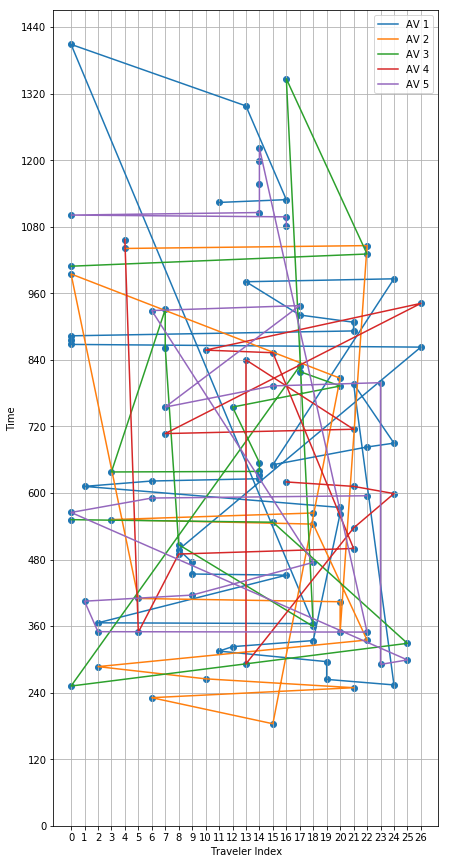

In [453]:
target_trips=traveler_trips.loc[(traveler_trips.tripmode<=6) &(traveler_trips.driver_passenger_flag>0)]
target_trips=target_trips[(target_trips.orig_taz!=target_trips.dest_taz) | (target_trips.trip_counter==1)]
community_hh_list=[972044,972024,2212041,2212030,937968,2285653,1309779,1738127,2034377,2066988]
community_trips=pd.DataFrame()
for hh_id in community_hh_list:
#     print(len(target_trips[target_trips.hh_id==hh_id]))
    community_trips=community_trips.append(target_trips[target_trips.hh_id==hh_id])
sorted_trips=community_trips.sort_values('starttime')
pod.analysis_one_hh_result(937968,[community_solution_allcar15],community_trips,5,Vehicular_Skim_Dict,superzone_map)